In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("../CWRU Dataset-2-train.csv")
Dtest = pd.read_csv("../CWRU Dataset-2-test.csv")

In [3]:
print(Dtrain.shape)
print(Dtest.shape)

(290688, 4)
(72672, 4)


In [4]:
Dtrain["Bearing"].value_counts()

Normal                 96896
Outer Race (0.021")    96896
Inner Race (0.021")    96896
Name: Bearing, dtype: int64

In [5]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Normal                 33.333333
Outer Race (0.021")    33.333333
Inner Race (0.021")    33.333333
Name: Bearing, dtype: float64

In [6]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

print(Dtest)

[[ 0.          1.          0.          0.         -0.04965046 -0.09635818]
 [ 0.          1.          0.          0.         -0.00438092 -0.11957455]
 [ 0.          1.          0.          0.         -0.00333785 -0.11258909]
 ...
 [ 0.          0.          1.          0.021      -0.2399979   0.29523818]
 [ 0.          0.          1.          0.021      -0.27410928  0.10067273]
 [ 0.          0.          1.          0.021       0.14578553  0.25353091]]


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))

In [10]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [11]:
import tensorflow as tf
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'elu'

In [12]:
# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(32, activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2, activation=act_func, kernel_initializer='glorot_uniform'))

model.add(Dense(32, activation=act_func, kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1], kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [13]:
NUM_EPOCHS=100
BATCH_SIZE=1000
history=model.fit(X_train,X_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1,
                  shuffle = False)

Train on 261619 samples, validate on 29069 samples
Epoch 1/100
261619/261619 [==============================] - 1s 3us/step - loss: 0.0570 - val_loss: 9.5306e-04
Epoch 2/100
261619/261619 [==============================] - 1s 2us/step - loss: 0.0508 - val_loss: 0.0013
Epoch 3/100
261619/261619 [==============================] - 1s 2us/step - loss: 0.0539 - val_loss: 8.0947e-04
Epoch 4/100
261619/261619 [==============================] - 1s 2us/step - loss: 0.0321 - val_loss: 9.2067e-04
Epoch 5/100
261619/261619 [==============================] - 1s 2us/step - loss: 0.0050 - val_loss: 8.1039e-04
Epoch 6/100
261619/261619 [==============================] - 1s 2us/step - loss: 9.5099e-04 - val_loss: 8.0948e-04
Epoch 7/100
261619/261619 [==============================] - 1s 2us/step - loss: 4.5313e-04 - val_loss: 7.9985e-04
Epoch 8/100
261619/261619 [==============================] - 1s 2us/step - loss: 4.2405e-04 - val_loss: 7.9477e-04
Epoch 9/100
261619/261619 [==========================

261619/261619 [==============================] - 1s 2us/step - loss: 4.0418e-04 - val_loss: 6.1747e-04
Epoch 72/100
261619/261619 [==============================] - 1s 2us/step - loss: 4.0342e-04 - val_loss: 6.0783e-04
Epoch 73/100
261619/261619 [==============================] - 1s 2us/step - loss: 4.0107e-04 - val_loss: 5.9711e-04
Epoch 74/100
261619/261619 [==============================] - 1s 2us/step - loss: 3.9888e-04 - val_loss: 5.8529e-04
Epoch 75/100
261619/261619 [==============================] - 1s 2us/step - loss: 3.9787e-04 - val_loss: 5.7255e-04
Epoch 76/100
261619/261619 [==============================] - 1s 2us/step - loss: 3.9764e-04 - val_loss: 5.5921e-04
Epoch 77/100
261619/261619 [==============================] - 1s 2us/step - loss: 3.9553e-04 - val_loss: 5.4544e-04
Epoch 78/100
261619/261619 [==============================] - 1s 2us/step - loss: 3.8947e-04 - val_loss: 5.3086e-04
Epoch 79/100
261619/261619 [==============================] - 1s 2us/step - loss: 3.8

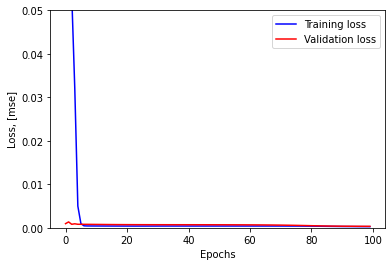

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

In [15]:
X_pred = model.predict(X_train)

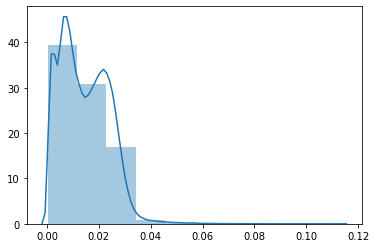

In [16]:
import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 10, kde= True);
#g.set(xlim=(0.05,0.10), ylim=(0, 1))
plt.show()

In [17]:
model.evaluate(X_test,X_test)

72672/72672 [==============================] - 1s 13us/step


0.0005614973516065249

In [27]:
TH = 0.05
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
scored['Threshold'] = TH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
229699,0.000498,0.05,False
216927,0.016010,0.05,False
87741,0.020416,0.05,False
131468,0.012007,0.05,False
117462,0.011108,0.05,False
...,...,...,...
196281,0.021113,0.05,False
138549,0.019011,0.05,False
259408,0.005574,0.05,False
189005,0.017582,0.05,False


In [28]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [29]:
scored_train['Loss_mae'].mean()

0.014484186337563766

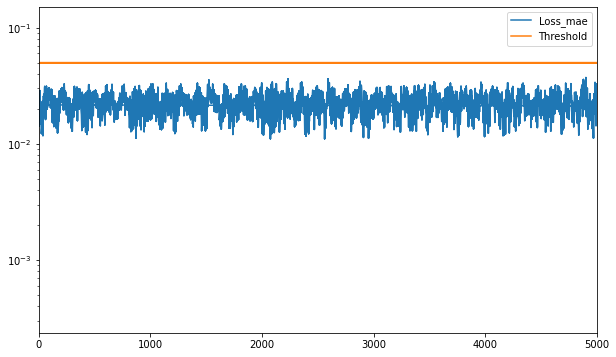

In [30]:
scored.plot(logy=True,  figsize = (10,6), xlim =[0,5000])

In [31]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.021644,0.05,False
1,0.017465,0.05,False
2,0.015327,0.05,False
3,0.014188,0.05,False
4,0.018257,0.05,False
...,...,...,...
290683,0.000971,0.05,False
290684,0.000765,0.05,False
290685,0.004585,0.05,False
290686,0.007744,0.05,False


In [32]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96976   0.054978       0.05     True
96978   0.053927       0.05     True
97130   0.052231       0.05     True
97358   0.052571       0.05     True
97813   0.052853       0.05     True
...          ...        ...      ...
288802  0.051369       0.05     True
289610  0.069372       0.05     True
289628  0.050310       0.05     True
290096  0.059419       0.05     True
290445  0.050573       0.05     True

[820 rows x 3 columns]
(820, 3)


In [33]:
NB_anomalies = anomalies[anomalies.index <= 96896]
print(NB_anomalies)
print(NB_anomalies.shape)

Empty DataFrame
Columns: [Loss_mae, Threshold, Anomaly]
Index: []
(0, 3)


In [34]:
IROR21_anomalies = anomalies[anomalies.index > 96896]
print(IROR21_anomalies)
print(IROR21_anomalies.shape)

        Loss_mae  Threshold  Anomaly
96976   0.054978       0.05     True
96978   0.053927       0.05     True
97130   0.052231       0.05     True
97358   0.052571       0.05     True
97813   0.052853       0.05     True
...          ...        ...      ...
288802  0.051369       0.05     True
289610  0.069372       0.05     True
289628  0.050310       0.05     True
290096  0.059419       0.05     True
290445  0.050573       0.05     True

[820 rows x 3 columns]
(820, 3)


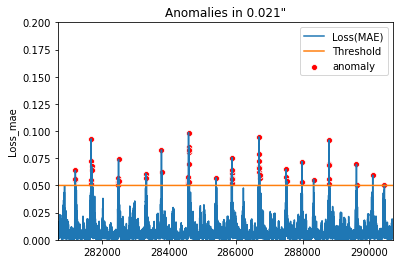

In [35]:
plt.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
plt.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (len(scored_train.index)-10000, len(scored_train.index)), ylim = (0, 0.2))
plt.title('Anomalies in 0.021"')
plt.legend();